# Generate by ChatGPT

URL: https://chatgpt.com/share/67fd9342-7fa0-8007-b0a2-439ba1c75738

In [95]:
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text

import pandas as pd

In [96]:
engine = create_engine('sqlite:///:memory:')

In [97]:
df_employees = pd.read_csv('../../data/employees.csv')

### 1. Liste todos os funcionários que ganham mais de 6000.

In [98]:
# Filtrando apenas os funcionários que ganham mais de 6000 no DataFrame

df_employees.query('salary > 6000')

,id,name,department_id,salary
0,1,Alice,1,7000
3,4,Diana,2,6500


In [99]:
# Cria uma tabela em memória chamada 'employees' [Se já existir, ela substitui a antiga]


df_employees.to_sql('employees', con=engine, if_exists='replace')

5

In [100]:
# Query a ser feita

q = 'SELECT * from employees WHERE salary > 6000'

In [101]:
# Executa o texto da Query no banco de dados

with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()

In [102]:
# Lê o SQL da query do banco de dados

pd.read_sql(q, con=engine)

,index,id,name,department_id,salary
0,0,1,Alice,1,7000
1,3,4,Diana,2,6500


#### 2. Recupere o funcionário com id = 3.

In [103]:
df_employees

,id,name,department_id,salary
0,1,Alice,1,7000
1,2,Bob,1,5000
2,3,Charlie,2,6000
3,4,Diana,2,6500
4,5,Edward,3,5500


In [104]:
# Busca pelo ID 3

df_employees.loc[df_employees['id'] == 3]
# df_employees.query('id == 3')

,id,name,department_id,salary
2,3,Charlie,2,6000


In [105]:
q = 'select * from employees where id = 3'

In [106]:
with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()

In [107]:
pd.read_sql_query(q, con=engine)

,index,id,name,department_id,salary
0,2,3,Charlie,2,6000


#### 3. Exercício 2 – Filtro por Faixa de Salário

- Liste os funcionários cujo salário está entre 5500 e 7000 (inclusive).



In [108]:
df_employees.query('salary >= 5500 and salary <= 7000')

,id,name,department_id,salary
0,1,Alice,1,7000
2,3,Charlie,2,6000
3,4,Diana,2,6500
4,5,Edward,3,5500


In [109]:
q = 'SELECT * from employees where salary between 5500 and 7000'

In [110]:
with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()

In [111]:
pd.read_sql_query(q, con=engine)

,index,id,name,department_id,salary
0,0,1,Alice,1,7000
1,2,3,Charlie,2,6000
2,3,4,Diana,2,6500
3,4,5,Edward,3,5500


#### 3. Filtro por Nome com LIKE

- Encontre todos os funcionários cujo nome começa com a letra “D”.


In [112]:
# Com pandas no Dataframe

df_employees[df_employees['name'].str.startswith('D', na=False)]


,id,name,department_id,salary
3,4,Diana,2,6500


In [113]:
q = 'select * from employees where name like "D%"'

In [114]:
with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()

In [115]:
pd.read_sql_query(q, con=engine)

,index,id,name,department_id,salary
0,3,4,Diana,2,6500


### 4. Filtro por Vários IDs

- Recupere os funcionários com os seguintes IDs: 1, 3 e 5.

In [116]:
df_employees[df_employees['id'].isin([1,3,5])]

,id,name,department_id,salary
0,1,Alice,1,7000
2,3,Charlie,2,6000
4,5,Edward,3,5500


In [117]:
q = 'select * from employees where id in (1,3,5)'

In [118]:
with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()

In [119]:
pd.read_sql_query(q, con=engine)

,index,id,name,department_id,salary
0,0,1,Alice,1,7000
1,2,3,Charlie,2,6000
2,4,5,Edward,3,5500


#### 5. Altere (no DataFrame, não no arquivo) o salário de todos os funcionários do departamento 2 para 7000.

In [120]:
# Altera na linha do department_id 2 para o salário de 7000.

# .loc[linhas, colunas] = valor

df_employees.loc[df_employees['department_id'] == 2, 'salary'] = 7000

df_employees

,id,name,department_id,salary
0,1,Alice,1,7000
1,2,Bob,1,5000
2,3,Charlie,2,7000
3,4,Diana,2,7000
4,5,Edward,3,5500


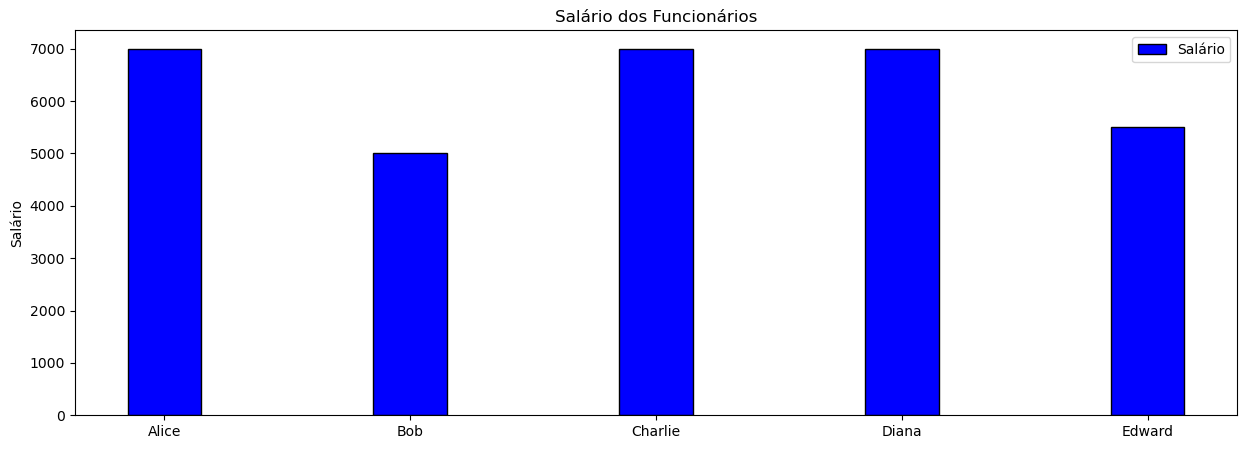

In [121]:
x = df_employees['salary']
y = df_employees['name']


fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(y, x ,label='Salário', width=0.3, facecolor='blue', edgecolor='black')
plt.ylabel('Salário')
plt.title('Salário dos Funcionários')
plt.legend()

plt.show()

In [122]:
q = 'update employees set salary = 7000 where department_id = 2'

In [123]:
with engine.connect() as conn:
  conn.execute(text(q))
  conn.commit()